In [ ]:
from skimage import io, exposure, filters, color

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install imshowpair

In [ ]:
import imshowpair

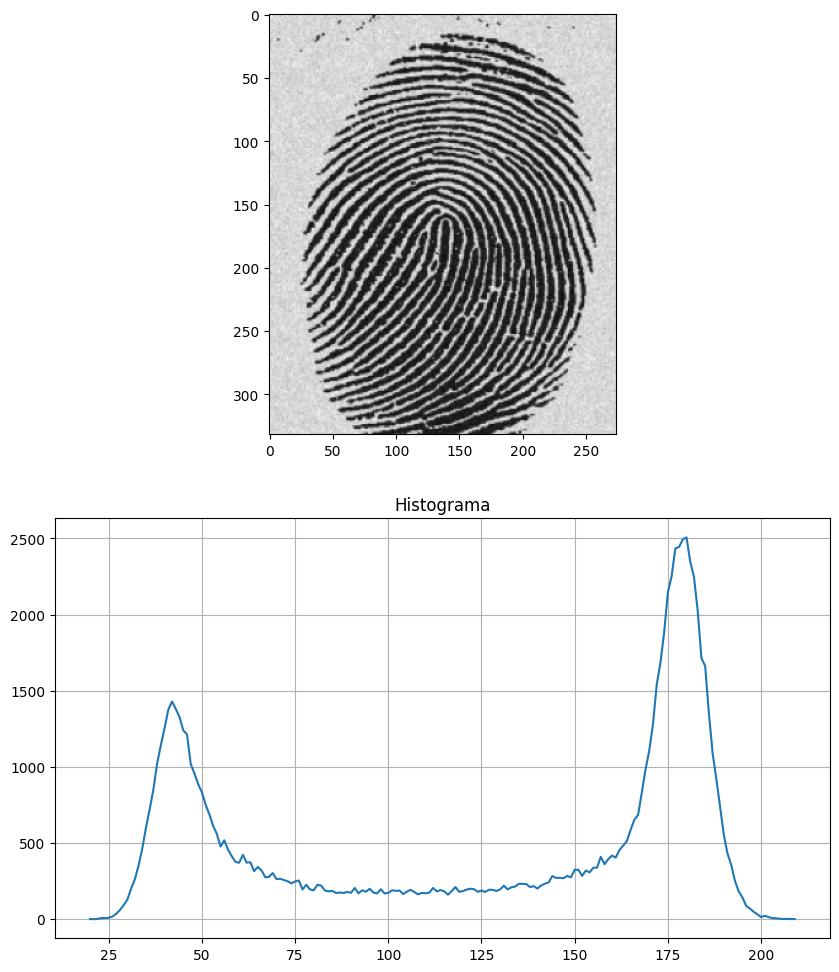

In [ ]:
fingerprint = io.imread("http://fmwconcepts.com/imagemagick/otsuthresh/images/fingerprint.jpg")
assert fingerprint is not None, "Error when reading image"
hist_y, hist_x = exposure.histogram(fingerprint)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(fingerprint, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

Como o fundo é mais claro que a digital, podemos utilizar "125" para a binarização da imagem

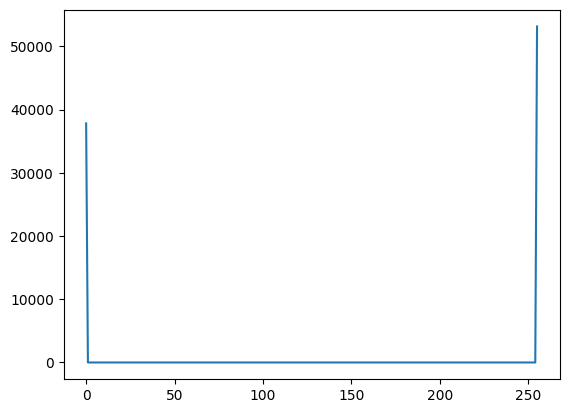

In [ ]:
fing_bin = fingerprint.copy()
fing_bin[fingerprint<125] = 0
fing_bin[fingerprint>=125] = 255
hist_y, hist_x = exposure.histogram(fing_bin)
plt.plot(hist_x, hist_y)
plt.show()

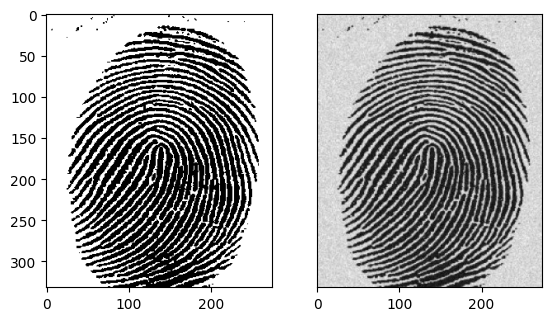

In [ ]:
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, sharey=ax1)
ax1.imshow(fing_bin, cmap=plt.cm.gray)
ax2.imshow(fingerprint, cmap=plt.cm.gray)
ax2.yaxis.set_visible(False)
plt.show()

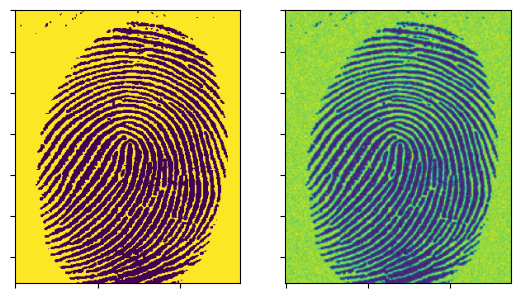

In [ ]:
imshowpair.imshowpair(fing_bin, fingerprint)

A binarização torna a imagem muito mais legível

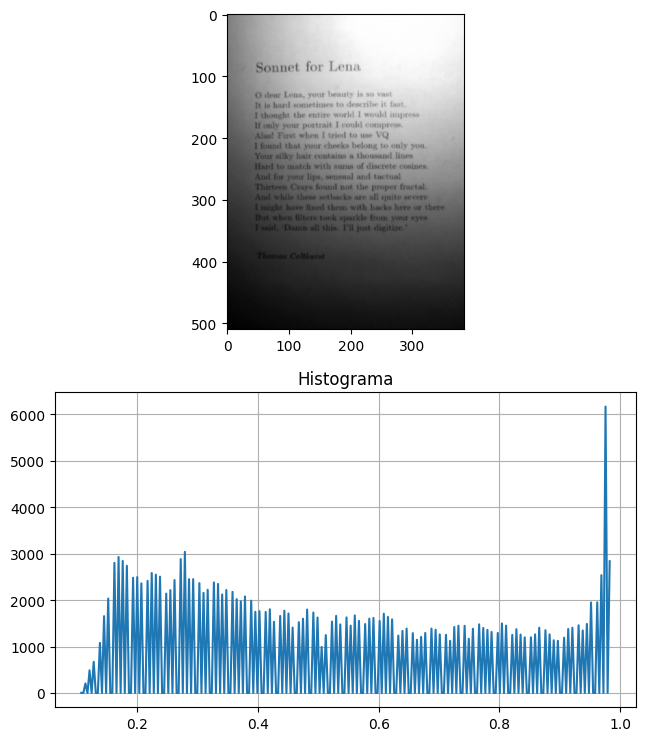

In [ ]:
son = color.rgb2gray(io.imread("https://homepages.inf.ed.ac.uk/rbf/HIPR2/images/son1.gif")[0, :, :])
assert son is not None, "Error when reading image"
hist_y, hist_x = exposure.histogram(son)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5, 9))
ax1.imshow(son, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

In [ ]:
son_bin = son.copy()
son_bin[son<0.5] = 0
son_bin[son>=0.5] = 1

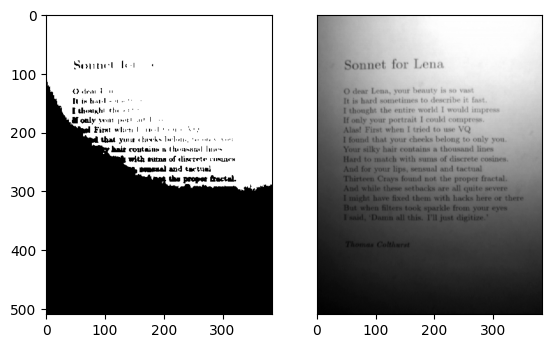

In [ ]:
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, sharey=ax1)
ax1.imshow(son_bin, cmap=plt.cm.gray)
ax2.imshow(son, cmap=plt.cm.gray)
ax2.yaxis.set_visible(False)
plt.show()

Resultado péssimo

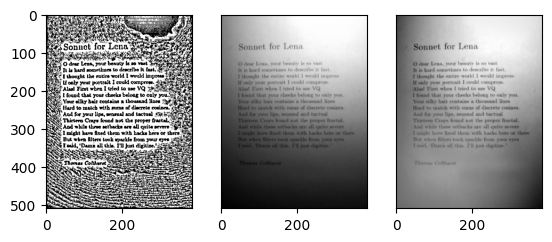

In [ ]:
gradient   = filters.threshold_local(son, 71)/1.5 # "Gradiente" da imagem
gradient   = np.flip(gradient)                    # Transpõe gradiente
son_locbin = filters.threshold_local(son, 21)
son_locbin = son > son_locbin
ax1 = plt.subplot(131)
ax2 = plt.subplot(132, sharey=ax1)
ax3 = plt.subplot(133, sharey=ax1)
ax1.imshow(son_locbin, cmap=plt.cm.gray)
ax2.imshow(son, cmap=plt.cm.gray)
gradient_fix = filters.threshold_local(son + gradient) # Toma vantagem da simetria da luz/sombra na imagem
ax3.imshow(gradient_fix, cmap=plt.cm.gray)
ax2.yaxis.set_visible(False)
ax3.yaxis.set_visible(False)
plt.show()

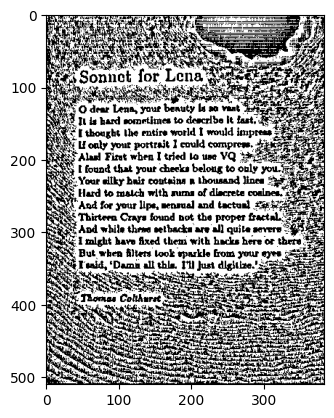

In [ ]:
plt.imshow(son_locbin, cmap=plt.cm.gray)

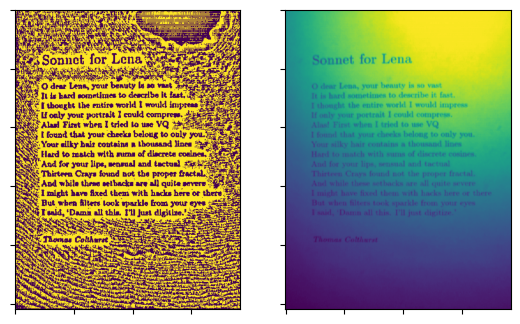

In [ ]:
imshowpair.imshowpair(son_locbin, son)

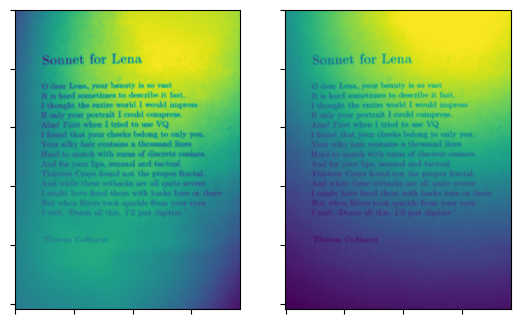

In [ ]:
imshowpair.imshowpair(gradient_fix, son)

Apesar de ter melhorado significativamente em comparação à binarização global, ainda há problemas significativos com a imagem binarizada localmente

/usr/local/lib/python3.11/dist-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


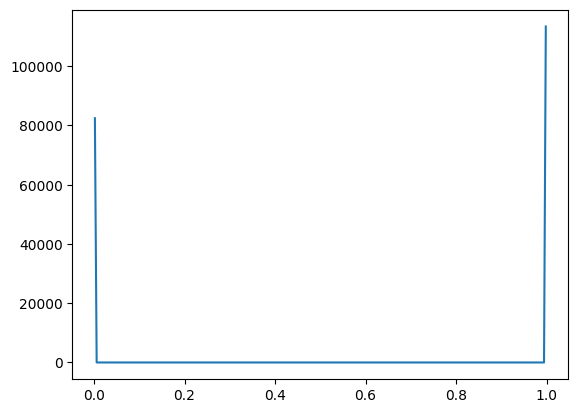

In [ ]:
hist_y, hist_x = exposure.histogram(son_locbin)
plt.plot(hist_x, hist_y)
plt.show()

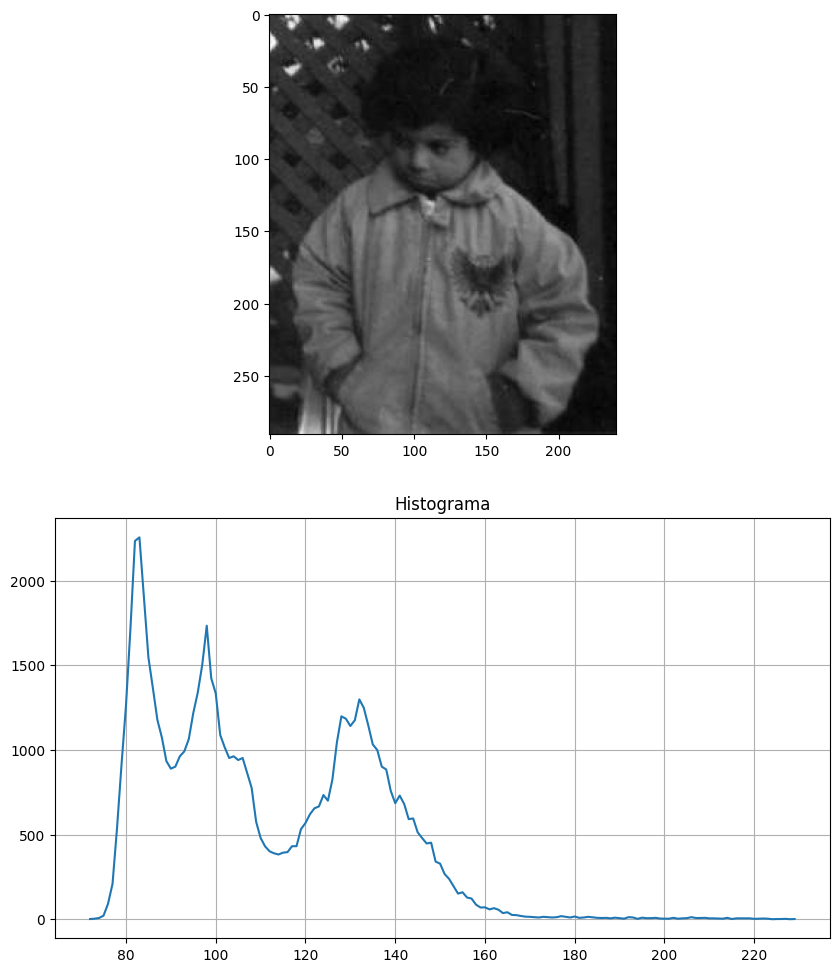

In [ ]:
pout = io.imread("http://www.johnloomis.org/ece563/notes/enhancement/scale/pout.jpg")
assert pout is not None, "Error when reading image"
hist_y, hist_x = exposure.histogram(pout)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(pout, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

Não encontrei a "imagem grey", então utilizei a imagem "pout"

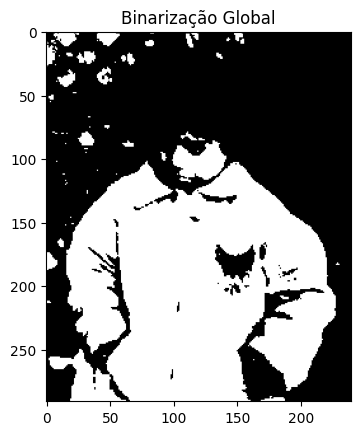

In [ ]:
pout_thr, pout_bin = cv.threshold(pout, 110, 225, cv.THRESH_BINARY)
assert pout_bin is not None, "Error with binerization of image"
plt.imshow(pout_bin, cmap=plt.cm.gray)
plt.title("Binarização Global")
plt.show()

É colcluído que a imagem é relativamente escura, com poucos pixels acima de 160 e que o menino é o "terceiro pico" do histograma, entre 120 e 160

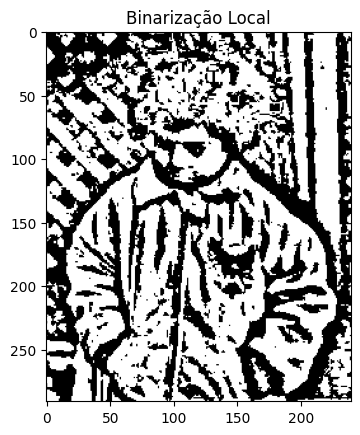

In [ ]:
pout_locbin = cv.adaptiveThreshold(pout, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                    cv.THRESH_BINARY, 37, 2)

plt.imshow(pout_locbin, cmap=plt.cm.gray)
plt.title("Binarização Local")
plt.show()

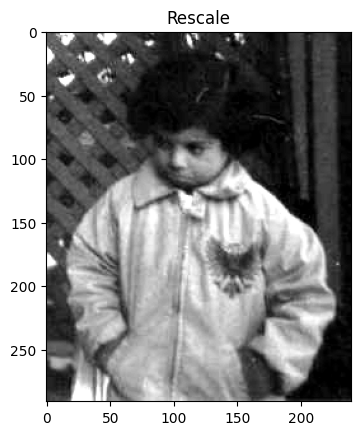

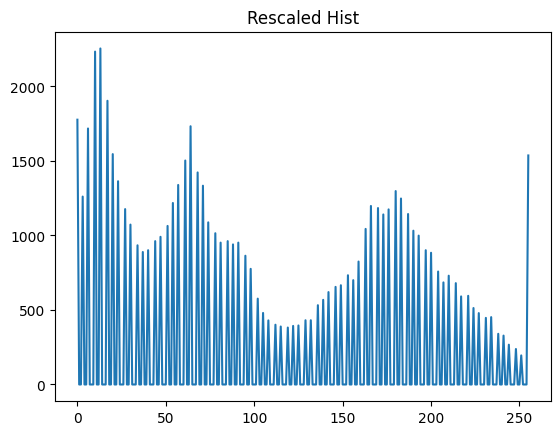

In [ ]:
p2, p98 = np.percentile(pout, (2, 98))

pout_rescale = exposure.rescale_intensity(pout, in_range=(p2, p98))
plt.imshow(pout_rescale, cmap=plt.cm.gray)
plt.title("Rescale")
plt.show()

hist_y, hist_x = exposure.histogram(pout_rescale)
plt.plot(hist_x, hist_y)
plt.title("Rescaled Hist")
plt.show()

Podemos ver que o histograma foi simplesmente "esticado", ou seja: a imagem foi multiplicada por valor constante para aumentar o contraste total

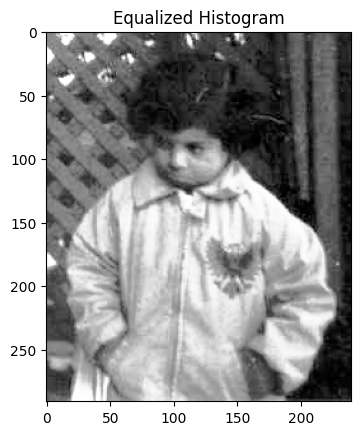

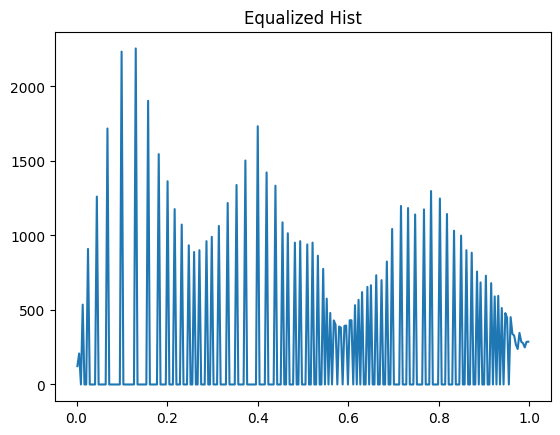

In [ ]:
pout_eq = exposure.equalize_hist(pout)
plt.imshow(pout_eq, cmap=plt.cm.gray)
plt.title("Equalized Histogram")
plt.show()

hist_y, hist_x = exposure.histogram(pout_eq)
plt.plot(hist_x, hist_y)
plt.title("Equalized Hist")
plt.show()

É notado que o histograma está agora mais espaçado. De forma a distribuir melhor os valores de intensidade pela imagem

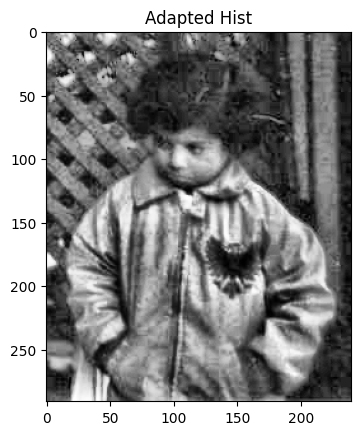

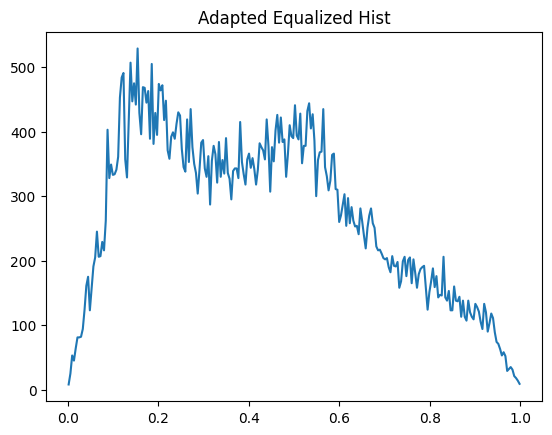

In [ ]:
pout_adapteq = exposure.equalize_adapthist(pout, clip_limit=0.03)
plt.imshow(pout_adapteq, cmap=plt.cm.gray)
plt.title("Adapted Hist")
plt.show()

hist_y, hist_x = exposure.histogram(pout_adapteq)
plt.plot(hist_x, hist_y)
plt.title("Adapted Equalized Hist")
plt.show()

Apesar de ser meio difícil de notar pelo histograma, podemos ver na imagem que há muito mais constrante local. Isto se deve à equalização do histograma ter sido feita localmente, ao invés de globalmente.

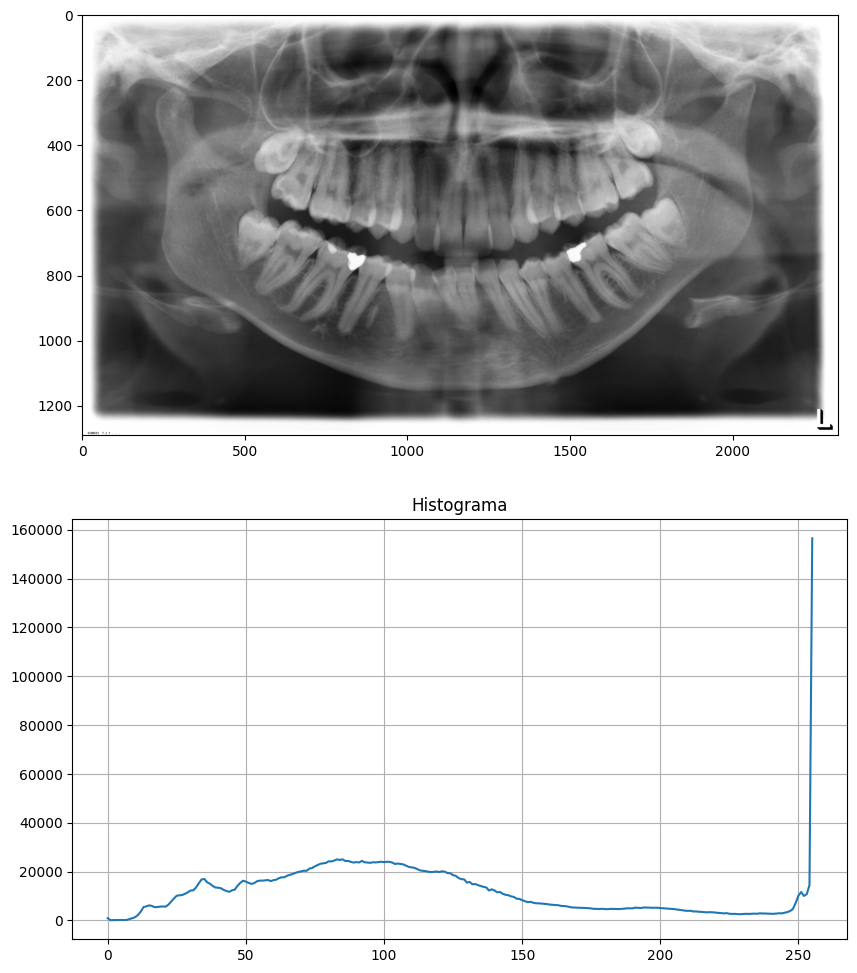

In [ ]:
dentrad = io.imread("https://imagej.net/ij/images/DentalRadiograph.png")
assert dentrad is not None, "Error when reading image. May have moved to another domain again."
hist_y, hist_x = exposure.histogram(dentrad)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.imshow(dentrad, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.show()

Como o histograma é pouco parelho e os detalhes que desejamos ver existem em regiões pequenas, foi escolhido a equalização de histograma adaptativa para melhorar a imagem

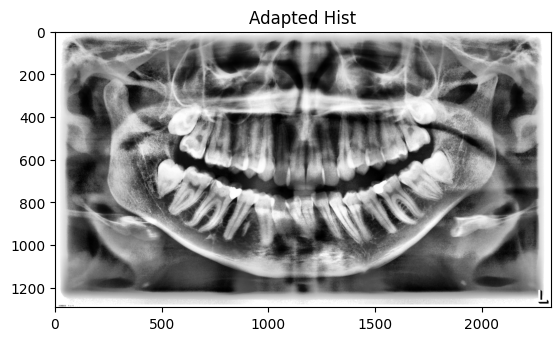

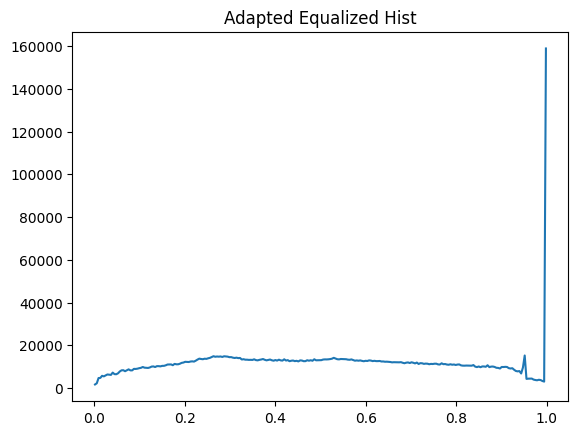

In [ ]:
dentrad_adapteq = exposure.equalize_adapthist(dentrad, clip_limit=0.05)
plt.imshow(dentrad_adapteq, cmap=plt.cm.gray)
plt.title("Adapted Hist")
plt.show()

hist_y, hist_x = exposure.histogram(dentrad_adapteq)
plt.plot(hist_x, hist_y)
plt.title("Adapted Equalized Hist")
plt.show()